In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('churn.csv', index_col=0)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [4]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
df.shape

(10000, 11)

In [6]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
cat_list = []
num_list = []

for variable in df.columns:
    if df[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)

print("Categorical Variables : ", cat_list, '\n')
print("Numerical Variables : ", num_list)

Categorical Variables :  ['Geography', 'Gender'] 

Numerical Variables :  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [7]:
cols = ['Geography', 'Gender'] 

In [8]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

In [9]:
X = df.drop('Exited', 1)
y = df['Exited']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [11]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)

In [26]:
from sklearn.metrics import r2_score

In [13]:
r2_score(y_test, y_preds)

0.10802306534518902

In [14]:
#p.fit(X_train, y_train)

In [15]:
y_preds = model_rf.predict(X_test)
y_preds[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
np.array(y_test)[:50]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [18]:
confusion_matrix(y_true=y_test, y_pred=y_preds)

array([[2304,   85],
       [ 349,  262]], dtype=int64)

In [20]:
y_preds.classes_

AttributeError: 'numpy.ndarray' object has no attribute 'classes_'

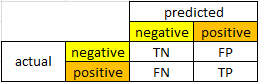

And if we want to switch the class label positions:

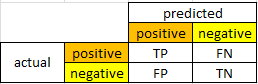

In [21]:
confusion_matrix(y_test, y_preds, labels=(1,0))

array([[ 262,  349],
       [  85, 2304]], dtype=int64)

In [22]:
confusion_matrix(y_test, y_preds, labels=(1,0)).ravel()

array([ 262,  349,   85, 2304], dtype=int64)

In [23]:
tp, fn, fp, tn = confusion_matrix(y_test, y_preds, labels=(1,0)).ravel()

In [101]:
precision = tp/(tp+fp)
precision

0.7528409090909091

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
fbeta_score, matthews_corrcoef

In [29]:
precision_score(y_test, y_preds)

0.7550432276657061

In [30]:
recall_score(y_test, y_preds)

0.4288052373158756

In [31]:
# harmonic mean of precision and recall
f1_score(y_test, y_preds)

0.546972860125261

In [32]:
# Precision more weight than recall (beta < 1)
fbeta_score(y_test, y_preds, beta=0.5)

0.655327663831916

In [33]:
# recall more weight than precision (beta > 1)
fbeta_score(y_test, y_preds, beta=2)

0.46936581870297384

In [34]:
# when both classes need to be predicted with good accuracies, MCC is better than F-measures
matthews_corrcoef(y_test, y_preds)

0.4951502326523252

In [35]:
from sklearn.metrics import SCORERS

In [36]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Training Score of Random Forest Classifier is: {:.3f}%".format(model_rf.score(X_train, y_train)*100))
print("\n \n")
print("The Confusion Matrix for Random Forest Classifier is: \n{}\n".format(confusion_matrix(y_test, y_preds)))
print("\n \n")
print("The Classification report: \n{}\n".format(classification_report(y_test, y_preds)))
print("\n \n") 
print("The Accuracy Score of Random Forest Classifier is: {:.3f}%".format(accuracy_score(y_test, y_preds)*100))

The Training Score of Random Forest Classifier is: 99.986%

 

The Confusion Matrix for Random Forest Classifier is: 
[[2309   80]
 [ 347  264]]


 

The Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.77      0.43      0.55       611

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



 

The Accuracy Score of Random Forest Classifier is: 85.767%


In [95]:
accuracy_score(y_test, y_preds)

0.8576666666666667